In [1]:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("FastagFraudDetection.csv")
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
df.shape

(5000, 13)

In [4]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [5]:
numeric_data=df.select_dtypes(include=["object","category"])
for X in numeric_data:
    df[X].fillna(df[X].mode()[0],inplace=True)
df.isnull().sum()

C:\Users\Keneye\AppData\Local\Temp\ipykernel_2516\4262816970.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[X].fillna(df[X].mode()[0],inplace=True)


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [11]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for X in category:
    df[X]=encoder.fit_transform(df[X])
    df.head()

In [12]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,362,0,2,0,0,0,350,120,3,65,1482,0
1,2,386,1,9,1,1,2,120,100,3,78,3066,0
2,3,409,2,0,3,1,2,0,0,3,53,3663,1
3,4,423,5,241,2,1,0,350,120,3,92,1498,0
4,5,27,6,2860,1,0,1,140,100,3,60,2409,0


In [13]:
X=df.drop(["Fraud_indicator"],axis=1)
y=df["Fraud_indicator"]

In [14]:
X.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number
0,1,362,0,2,0,0,0,350,120,3,65,1482
1,2,386,1,9,1,1,2,120,100,3,78,3066
2,3,409,2,0,3,1,2,0,0,3,53,3663
3,4,423,5,241,2,1,0,350,120,3,92,1498
4,5,27,6,2860,1,0,1,140,100,3,60,2409


In [9]:
y.head()


0        Fraud
1        Fraud
2    Not Fraud
3        Fraud
4        Fraud
Name: Fraud_indicator, dtype: object

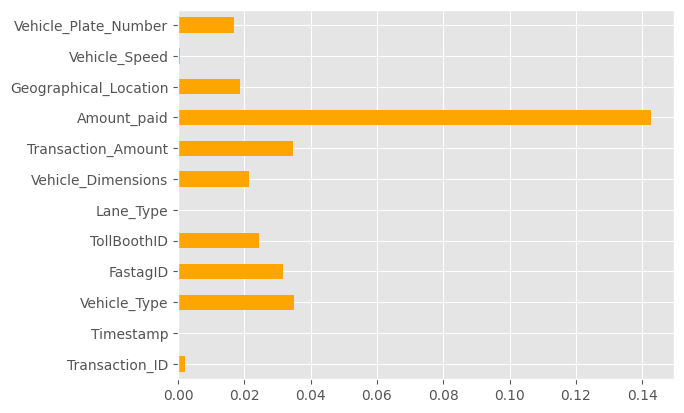

In [15]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="orange")
plt.show()

In [16]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [17]:
X=df.drop(['Transaction_ID','Lane_Type','Vehicle_Speed','Geographical_Location'],inplace=True,axis=1)

In [20]:
X=df.drop(["Fraud_indicator"],axis=1)
y=df["Fraud_indicator"]

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)

In [22]:
##solver data below 20k
clasif=LogisticRegression(solver="newton-cg")
clasif.fit(xtrain,ytrain)


LogisticRegression(solver='newton-cg')

In [ ]:
pred1=clasif.predict(xtest)
pred1

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [ ]:

print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       195
           1       0.98      1.00      0.99       805

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



<Axes: >

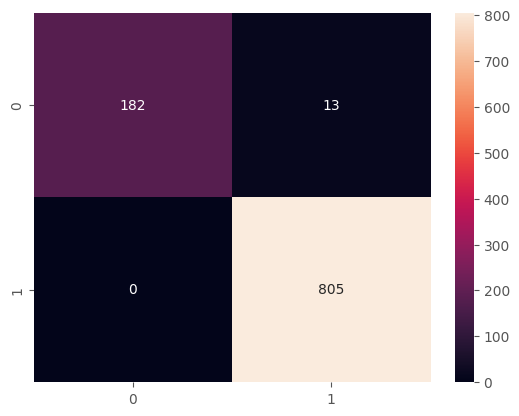

In [ ]:
cn=confusion_matrix(ytest,pred1)
sns.heatmap(cn,annot=True,fmt="0.9g")

In [ ]:
outcome={
    "Actual price":ytest,
    "predicted Price":pred1
}
df_classification=pd.DataFrame(outcome)
df_classification.head()

,Actual price,predicted Price
2764,1,1
4767,0,0
3814,0,0
3499,1,1
2735,1,1
